In [1]:
using Plots, LaTeXStrings

# Tarea 4

**Envío del PR inicial:** lunes 26 de septiembre

**Aceptación del PR:** lunes 10 de octubre

**Ejercicio 0:** Velocidad de convergencia

El objetivo de este ejercicio es relacionar, la velocidad de convergencia con que un punto fijo (o una órbita periódica, en el caso de los dos últimos incisos) atraen a puntos suficientemente cercanos, con la derivada del mapeo en el punto fijo (o ciclo periódico). La idea es, entonces, calcular primero el punto fijo y, después, medir cómo la distancia de los iterados sucesivos (de una condición inicial $x_0$) al punto fijo se comporta en el tiempo, para los siguientes mapeos:

- $F(x) = x^2+0.25$

- $F(x) = 3x(1-x)$

- $F(x) = \exp(x-1)$

- $F(x) = x^2 - 1.25$

- $F(x) = \exp(x+1)$

  Deberán resolver algunas cosas intermedias. Por ejemplo, ¿qué tanto deben acercarse al punto fijo, a fin de evitar ruido numérico? ¿Qué hay que hacer en el caso en que el punto sea neutral (ni atractivo ni repulsivo)?

  En los dos últimos incisos, el interés es en los ciclos de periodo 2.

**Ejercicio 1:**

Llamemos $c_n$ el valor del parámetro $c$ donde ocurre la bifurcación de doblamiento de periodo para el mapeo $Q_c(x)$, donde la órbita de periodo $2^n$ nace. Es decir, tenemos que $c_0=1/4$ marca la aparición del atractor de periodo $2^0=1$, $c_1=-1/4$ corresponde a la aparición del atractor de periodo $2^1=2$, $c_2=-3/4$ a la aparición del atractor de periodo $2^2=4$, etc. 

A partir de estos valores y otros que calcularán (al menos deben encontrar $c_6$), definimos la secuencia: $\{f_0, f_1, f_2, \dots\}$, donde

\begin{equation}
f_n = \frac{c_n-c_{n+1}}{c_{n+1}-c_{n+2}} .
\end{equation}

La pregunta es, ¿a qué valor converge esta secuencia?, es decir, dar una estimación de $f_\infty$.



*Hint:* Para realizar este ejercicio deben calcular el atractor para varias valores de $c$, de tal manera que puedan aislar las órbitas de periodo $2^p$ y de ahí determinar varios valores $c_n$. Sin embargo, van a requerir suficiente cuidado para obtener una buena aproximación de $c_n$. 

Una opción, que tiene ciertos inconvenientes numéricos que también ciertas ventajas se basa en recordar/usar que las bifurcaciones de doblamiento de periodo ocurren cuando los puntos de la órbita de periodo $p$ se tornan en repulsores, es decir, $(Q_c^p)'(x)=-1$. Esta opción, entonces, involucra obtener los valores $c_n$ usando los polinomios $Q_c^p(x)$ y diferenciación automática.

In [11]:
function F1(x,c)
    f1 = x^2 + c
end

F1 (generic function with 1 method)

In [12]:
function Fc(f,x,rango,n)
    Eje=[]
    Datos=[]
    for c = rango
        y = x
        for j = 1:n
            y = f(y,c)
            if (j > n - 32)
                push!(Eje,c)
                push!(Datos,y)
            end
        end
    end 
    scatter(Eje,Datos, markershape=:circle, markersize=0.75, markeralpha=0.25,
        xaxis=(L"c", (-2.0:0.1:0.0)), 
        yaxis=(L"P", (-2.0:2.0)),
        grid=false)
end

Fc (generic function with 2 methods)


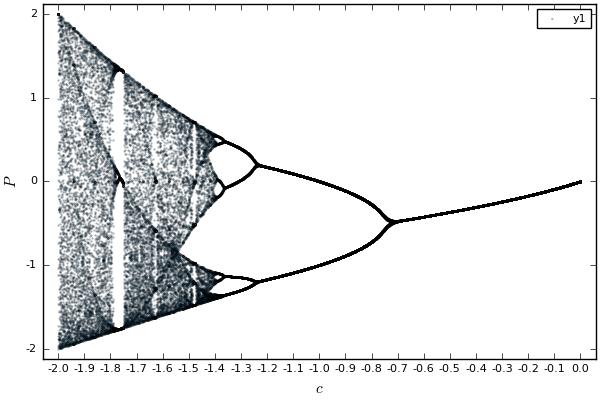

In [13]:
Fc (F1,0.0,-2.0:0.001:0.0,100)

In [34]:
function FcPuntos(x,rango,n,l)
    Aux=0
    P=1
    Eje=Float64[]
    Datos=Float64[]
    for c = rango
        y = x
        for j = 1:n
            y = y^2 + c
        end
        for j = 1:(P+1)
            y = y^2 + c
            push!(Eje,c)
            push!(Datos,y)
        end
        if (Datos[length(Datos)]-Datos[(length(Datos)-P)] > 1E-9)   
            for k = (c+0.0002):-0.00001:(c-0.0002)
                y = x
                for j = 1:25n
                    y = y^2 + k
                end
                for j = 1:(P+1)
                    y = y^2 + k
                    push!(Eje,k)
                    push!(Datos,y)
                end
                if (Datos[length(Datos)]-Datos[(length(Datos)-P)] > 1E-9)   
                    Aux +=1
                    P = 2^Aux
                    println("C_$Aux: ",Eje[(length(Eje)-1)])
                    println("P: ",P)
                    break
                end
            end 
        end
        if (Aux == l)
            break
        end
    end 
end

FcPuntos (generic function with 1 method)

In [35]:
FcPuntos(0.0,0.25:-0.0001:-2.0,100000,7)

C_1: -0.75
P: 2
C_2: -1.25
P: 4
C_3: -1.3681
P: 8
C_4: -1.39405
P: 16
C_5: -1.39964
P: 32
C_6: -1.40123
P: 64
C_7: -1.4016
P: 128


**Ejercicio 2:**

Repitan el ejercicio anterior para el mapeo $S_c(x) = c \sin(x)$. ¿Cómo se comparan los valores obtenidos de $f_n$?

**Ejercicio 3:**

Como se ve en la Fig. 1 (de [este](https://github.com/lbenet/2017-1_TSFisComp/blob/master/notas_clase/08_Mapeos1d-3.ipynb) notebook), $x=0$ pertenece a un ciclo de periodo $2^n$ para ciertos valores $C_n$ del parámetro. Dichos valores son *especiales*, ya que $x=0$ esté en el ciclo de periodo $2^n$ marca los llamados *ciclos superestable*, donde tenemos $(Q^{2^p}_{C_n})'(0)=0$.

¿A qué converge la secuencia $f_n$, definida ahora con los valores $C_n$.

De los $2^p$ puntos del ciclo de periodo $2^p$, es decir, $\{0, p_1, \dots p_{2^{n-1}}\,\}$ hay uno (distinto del 0) cuya distancia a 0 es menor; a ese punto lo identificamos como $d_n$. Calcular numéricamente a dónde converge la secuencia $d_n/d_{n+1}$.